Blatt 3 Beispiellösung
-------

Ansehen auf
[Github](https://github.com/jonasitzmann/grundlagen_ml/blob/master/ex3.ipynb)
oder mit 
[Google Colaboratory](https://colab.research.google.com/github/jonasitzmann/grundlagen_ml/blob/master/ex3.ipynb)
ausführen.

Clone repository if necessary (for example for execution in google colab)

In [1]:
import os
if not os.path.exists('grundlagen_ml'):
  print('cloning repository github.com/jonasitzmann/grundlagen_ml')
  os.system('git clone https://github.com/jonasitzmann/grundlagen_ml')
  os.chdir('grundlagen_ml')

# Task 3.1 Gewichteter Fehler theoretisch:
<font color='#1d478c'>
Nehmen Sie an, ein Datensatz $\vec x_n$ , $\vec t_n$ ist gegeben,
wobei jeder Trainingsdatenpunkt $n$ mit einem Faktor $r_n$ gewichtet ist.  
Setze ein lineares Model
$y_n = \omega^T \phi(\vec x_n)$
an (für irgendein $\phi\left( \right)$ und $n = 1 \dots N$ Trainingsdaten)
und betrachte die entsprechende Fehlerfunktion.  
$$
E_D(\vec\omega) = \sum_{n=1}^{N} r_n
\left(
t_n - \vec\omega^T \phi \left( x_n \right)
\right) ^2
$$  
Finde die Lösung für die optimalen Parameter $\omega$
</font>

#### Idee:
Ich führe den gewichteten quadratischen Fehler auf den ungewichteten quadratischen Fehler zurück.
Dieser lässt sich, wie in Übung 2 behandelt durch die
[Moore-Penrose-Pseudoinverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse)
minimieren.

\begin{align}
E_D(\vec\omega) &= \sum_{n=1}^{N} r_n \left( t_n - \vec\omega^T \phi \left( x_n \right) \right) ^2 \\  
&= \sum_{n=1}^{N} \left(\sqrt{r_n} \left( t_n - \vec\omega^T \phi \left( x_n \right) \right) \right) ^2 \\
&= \sum_{n=1}^{N} \left(\sqrt{r_n} t_n - \sqrt{r_n} \vec\omega^T \phi \left( x_n \right) \right) ^2 \\
&= \sum_{n=1}^{N} \left(\sqrt{r_n} t_n - \sqrt{r_n} \phi \left( x_n \right)^T \vec\omega \right) ^2 \\
\end{align}

Ich definiere $\tilde t_n$ und $\tilde \phi \left( x_n \right)$ wie folgt:  
$\tilde t_n := \sqrt{r_n} t_n$  
$\tilde \phi \left( x_n \right) := \sqrt{r_n}\phi \left( x_n \right)$  
und erhalte:
$$
E_D(\vec\omega) = \sum_{n=1}^{N} \left( \tilde{t_n} - \tilde\phi \left( x_n \right)^T \vec\omega \right) ^2  
$$  
Es müssen also lediglich alle Einträge $t_n$ und $\phi \left( x_n \right)$ mit $\sqrt{r_n}$
multipliziert werden, bevor der quadratische Fehler minimiert wird.  
Wie in Übung 2 ist $\mathbf X$ die Designmatrix.  
Zusätzlich führe ich die Matrix $\mathbf R$ ein, als Diagonalmatrix mit den Einträgen $\sqrt{r_n}$ ein:

$$
\mathbf R =
\begin{pmatrix}
\sqrt r_1 &&\Large 0\\
&\ddots &\\
\Large0&&\sqrt r_n\\
\end{pmatrix}
$$

Aus Übung 2 ist die Pseudoinverse bekannt, durch die der ungewichtete quadratische Fehler minimiert wird:
$$ \vec \omega^* = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \vec t$$
Um die Parameter $\vec \omega_{\vec r}^*$ zu finden, die dengewichteten quadratischen Fehler
minimieren, muss ich lediglich alle Einträge
$t_n$ und $\phi \left( x_n \right)$ mit $\sqrt{r_n}$ multiplizieren:  

$$\vec{\tilde t} := \mathbf{R} \vec t$$  (Vectorpfeil wird im Folgenden weggelasen)  
$$\mathbf{\tilde X} := \mathbf{RX}$$  

Damit gilt:

$$ \vec \omega_{\vec r}^* = (\mathbf{\tilde X}^T \mathbf{\tilde X})^{-1} \mathbf{\tilde X}^T \tilde t$$

<font color='#1d478c'>
und interpretiere die Parameter $r_n$ im Sinne von (1) datenabhängiger Unsicherheit
</font>

Wenn Unsicherheiten als Varianten $\sigma_n^2$ bzw.
als Präzisionen $\beta_n = \frac{1}{\sigma_n^2}$ der Datenpunkte bekannt sind,
kann $\beta_n$ als Gewicht verwendet werden. Somit haben sichere Datenpunkte
einen höheren Einfluss auf $\vec \omega^*$.

<font color='#1d478c'>
Duplikationen von Datenpunktion
</font>

Duplizierte Datenpunkte, entsprechend doppelt gewertet werden sollen,
können durch einen Datenpunkt ersetzt werden, dessen Gewicht doppelt so hoch ist.
Das hilft, den Datensatz zu komprimieren.

# Task 3.2 Gewichteter Fehler praktisch:
<font color='#1d478c'>
Verwenden Sie nun den Datensatz der Regressionsaufgabe von Blatt zwei
und gewichten Sie die Punkte bei input $-\frac{1}{2}$ und $\frac{1}{2}$ doppelt, 10-fach, 100-fach.
Dazu können Sie das publizierte Matlab-Script leicht verändern.  
</font>

In [2]:
import pandas as pd
import numpy as np
from numpy import sqrt, diag
from functools import partial
from helpers import load_dataset, plot, plot_df, design_mat_polynomial, get_y, plot_weights
from numpy.linalg import pinv as pseudoinverse # better precision than my implementation
from scipy.stats import norm # pdf for normal distribution

In [3]:
""" returns weight vector with all ones except the indices of x that are in selection. """
def get_weights(x, selection, selection_weight):
    return selection_weight**x.isin(selection)
df = load_dataset()
for factor in [1, 2, 10, 100]:
    df['weight_x{}'.format(factor)] = get_weights(df.x, [-.5, .5], factor)
display(df.T)

,0,1,2,3,4,5,6,7,8
x,-1.0,-0.75,-0.5,-0.25,0.00,0.25,0.5,0.75,1.0
y,-1.0,0.10,0.6,0.50,-0.05,-0.50,-0.7,-0.20,1.0
weight_x1,1.0,1.00,1.0,1.00,1.00,1.00,1.0,1.00,1.0
weight_x2,1.0,1.00,2.0,1.00,1.00,1.00,2.0,1.00,1.0
weight_x10,1.0,1.00,10.0,1.00,1.00,1.00,10.0,1.00,1.0
weight_x100,1.0,1.00,100.0,1.00,1.00,1.00,100.0,1.00,1.0


Zusätzlich verschiebe ich den Datenpunkt bei $x= -\frac{1}{2}$ um $0.3$,
damit der Einfluss der Gewichte gut sichtbar ist.

In [4]:
df.loc[df.x==-1/2, 'y'] += 0.3
display(df.T)

,0,1,2,3,4,5,6,7,8
x,-1.0,-0.75,-0.5,-0.25,0.00,0.25,0.5,0.75,1.0
y,-1.0,0.10,0.9,0.50,-0.05,-0.50,-0.7,-0.20,1.0
weight_x1,1.0,1.00,1.0,1.00,1.00,1.00,1.0,1.00,1.0
weight_x2,1.0,1.00,2.0,1.00,1.00,1.00,2.0,1.00,1.0
weight_x10,1.0,1.00,10.0,1.00,1.00,1.00,10.0,1.00,1.0
weight_x100,1.0,1.00,100.0,1.00,1.00,1.00,100.0,1.00,1.0


In [5]:
def polyfit(x, y, order=3, weights=None):
    x, y = [np.array(a).reshape(-1, 1) for a in [x, y]]
    weight_mat = np.eye(len(x)) if weights is None else diag(sqrt(np.array(weights)))
    design_mat = weight_mat @ design_mat_polynomial(x, order)
    y = weight_mat @ y
    params = pseudoinverse(design_mat) @ y
    return params.reshape(-1, 1)

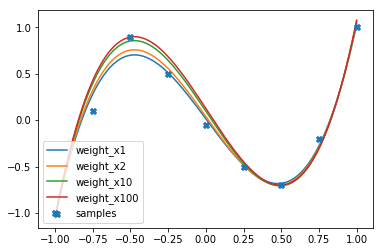

In [6]:
polyfit_weighted = partial(polyfit, df.x, df.y, order=3)
w_cols = [col for col in df.columns if 'weight' in col]
coeff_dict = {col : polyfit_weighted(weights=df[col]) for col in w_cols}
plot_df(df, coeff_dict)

<font color='#1d478c'>
Verwenden Sie wieder Polynome zur Approximation und variieren Sie den Grad.  
Was erwarten Sie, wie wird sich das optimale Modell mit der Wahl des Polynomgrades ändern wird?  
</font>

Je höher der Grad, desto kleiner die Abweichung zu den Datenpunkten.
Allerdings führt ein hoher Grad zu kleinen "Schlenkern" und vielen Extrempunkten,
generalisiert also schlecht.

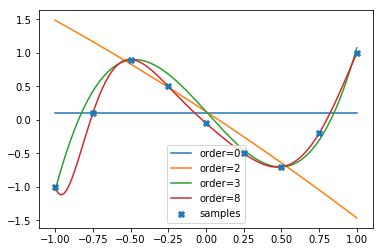

In [7]:
orders = [0, 2, 3, 8]
order_coeff_dict = {"order={}".format(o) : polyfit(df.x, df.y, order=o, weights=df.weight_x100) for o in orders}
plot_df(df, order_coeff_dict)

<font color='#1d478c'>
Gewichten Sie dann auch noch den Punkt bei Eingabe $-1$ höher.
</font>

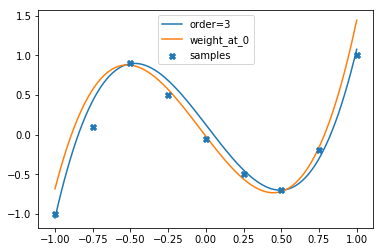

In [8]:
weights = get_weights(df.x, [-.5, 0, .5], 100)
reference = 'order=3'
coeff_dict = {reference : order_coeff_dict[reference]}
coeff_dict['weight_at_0'] = polyfit(df.x, df.y, order=3, weights=weights)
plot_df(df, coeff_dict)

<font color='#1d478c'>
Was ändert sich?
</font>

Das Modell geht nun auch (zumindest beinah) durch den Ursprung.

<font color='#1d478c'>
Welche Form wird das optimale Modell haben und warum?  
</font>

Ein optimales Modell gibt es nicht.
Ein Polynom 8. Grades geht durch alle Datenpunkte, würde die Fehlerfunktion also minimieren,
generalisiert aber schlecht.  
Z.B. das Polynom 3. Grades stellt einen guten Kompromiss aus Underfitting und Overfitting dar.

# Task 3.3 Gewichteter Fehler: multiple lokale Modelle:
<font color='#1d478c'>
Nehmen Sie nun an, Sie generieren die Gewichte $r_n$ aus einer Gaussfunktion
mit einer Varianz $\beta^2$ (z.B. $\beta^2 = 1$) und Mittelwert $\mu$.
</font>

<font color='#1d478c'>
Welchen Effekt hat das auf die Modellierung?  
</font>

Der Einfluss der Datenpunkte auf die Modellparameter fällt mit dem Abstand zum Mittelwert ab.  
Es ist, als würde das Modell die Daten in der "Nähe" besser sehen, als die weit entfernten Samples.

<font color='#1d478c'>
Überlegen Sie dazu, welche Datenpunkte jeweils wichtig sind,
wenn $\mu = −\frac{1}{2}, 0, \frac{1}{2}$ ist. 
</font>

Wichtig sind die Datenpunke, die nahe an dem jeweiligen Mittelpunkt liegen.

$\beta^2 = 1$ scheint kein guter Wert zu sein.  
Ich nehme $\beta = 0.3$ und verschiebe zusätzlich die ersten
drei Datenpunkte um $0.2$ nach unten.

In [9]:
df = load_dataset() # reset

<font color='#1d478c'>
Diese Überlegungen legen nahe, das Datenmodell als Summe mehrerer lokaler Modelle zu wählen.
Wie könnten diese lokalen Modelle aussehen, wenn wir Gaussgewichtungen mit
$\mu_1 = −\frac{1}{2}$ und $\mu_2 = \frac{1}{2}$
und das Gesamtmodell als Summe von zwei lokalen Modellen wählen?  
</font>

Es müssten Parabeln genügen, da jedes Modell nur einen Teil abbilden muss und sich der Datensatz recht gut  
als zwei aneinander gelegte Parabeln beschreiben lässt

In [10]:
import matplotlib.pyplot as plt
from collections import namedtuple
from functools import partial

In [11]:
LocalModel = namedtuple('LocalModel', 'coeffs,distribution'.split(','))

# evaluate the prediction of the model ensemble at the point x
def combine_local_models(models, x):
    # calc weights at x (proportional to each pdf and summing to 1)
    weights = np.array([m.distribution.pdf(x) for m in models])
    weights /=  weights.sum()
    results = np.array([get_y(model.coeffs, np.array(x)) for model in models])
    return (results.ravel() * weights.ravel()).sum()

# plot model enseble along with data samples (x,y)
def plot_local_models(x, y, models, combination_only=False, **kwargs): # kwargs are passt through
    combine_models = np.vectorize(partial(combine_local_models, models)) # to be called on arrays
    xmin, xmax = min(x), max(x)
    n_samples = 200
    ax = plt.gca()
    if not combination_only:
        for model in models:
            label = 'mean={}'.format(model.distribution.mean())
            plot_weights(model.coeffs, label, xmin, xmax, ax, ls='--')
    xs = np.linspace(xmin, xmax, n_samples)
    ys = combine_models(xs)
    ax.plot(xs, ys, label='combined local models', lw=3, **kwargs)
    ax.scatter(x, y, label='samples', marker='X', zorder=10)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

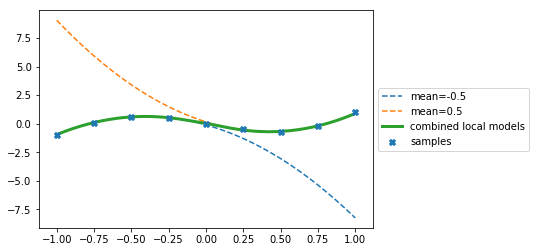

In [12]:
order = 2
sigma = 0.2
means = [-1/2, 1/2]
dists = [norm(mean, sigma) for mean in means]
coeffs = [polyfit(df.x, df.y, order, d.pdf(df.x)) for d in dists]
models = [LocalModel(*tupel) for tupel in zip(coeffs, dists)]
plot_local_models(df.x, df.y, models)

<font color='#1d478c'>
Wie, wenn man drei lokale Modelle verwenden wollte?  
</font>

Dann könnte man es sogar mit Geraden versuchen:

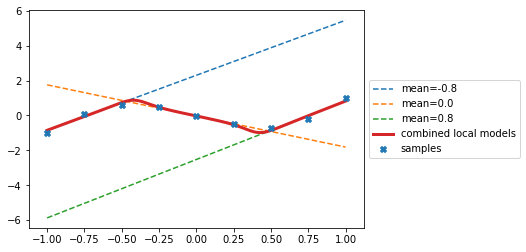

In [13]:
order = 1
sigma = 0.2
means = [-0.8, 0, 0.8]
dists = [norm(mean, sigma) for mean in means]
coeffs = [polyfit(df.x, df.y, order, d.pdf(df.x)) for d in dists]
models = [LocalModel(*tupel) for tupel in zip(coeffs, dists)]
plot_local_models(df.x, df.y, models)

Extremfall:
9 Gewichte (je eines pro Datenpunkt), Grad 2 und kleines $\sigma^2$

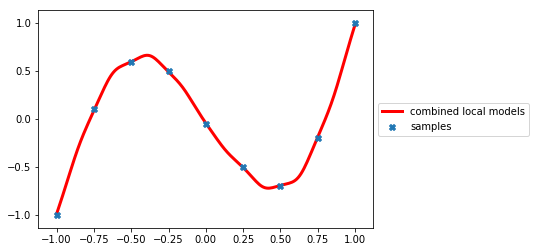

In [14]:
order = 1
sigma = 0.1
means = np.linspace(-1, 1, 9)
dists = [norm(mean, sigma) for mean in means]
coeffs = [polyfit(df.x, df.y, order, d.pdf(df.x)) for d in dists]
models = [LocalModel(*tupel) for tupel in zip(coeffs, dists)]
plot_local_models(df.x, df.y, models, combination_only=True, color='r')

<font color='#1d478c'>
Wo sollten dann die drei Mittelpunkte $\mu_1$, $\mu_2$, $\mu_3$
für die jeweiligen Gaussfunktionen liegen,
mit denen die Gewichte erzeugt werden, und was für ein Modell
(d.h. welche Wahl der jeweiligen Polynomgrade) wäre sinnvoll?  
</font>

# Task 3.4 Gradientenberechnungen für $\text{tanh}$:
<font color='#1d478c'>
Zeige, dass gilt:  
$$
f(s) = \text{tanh}(\beta s) \rightarrow f^\prime(s) = \beta (1 − f (s)^2)
$$
</font>

Ich betrachte zunächst $g(x) = \text{tanh}(x)$ 

\begin{align}
\text{tanh}(x) &= \frac{e^{2x}-1}{e^{2x}+1}\\
&=\frac{e^{2x}-1}{e^{2x}+1} \frac{e^{-x}}{e^{-x}}\\
&=\frac{e^x-e^{-x}}{e^x + e^{-x}}\\
\end{align}

Ich wende die Quotientenregel an und erhalte:

\begin{align}
\rightarrow \frac{\partial}{\partial x} tanh &=
\frac{
\left(e^x + e^{-x}\right)
\left(e^x + e^{-x}\right)-
\left(e^x - e^{-x}\right)
\left(e^x - e^{-x}\right)
}{
\left(e^x -e^{-x}\right)^2
}\\
&= 1 - 
\frac{
\left(e^x - e^{-x}\right)
\left(e^x - e^{-x}\right)
}{
\left(e^x -e^{-x}\right)^2
}\\
&= 1-\text{tanh}(x)^2\\
\end{align}

Dann wende ich die Kettenregel an und erhalte:

\begin{align}
f^\prime(s) &= \text{tanh}^\prime(\beta s) \frac{\partial\beta x}{\partial x}\\
&= \beta \left(1 − \text{tanh}(\beta s)^2\right)\\
&= \beta (1 − f (s)^2)\\
\end{align}

<font color='#1d478c'>
Berechne dann den Gradienten der folgenden Fehler-funktion:
$$
\nabla _{\vec\omega_i} E(\vec\omega) = 
\nabla _{\vec\omega_i} \frac 12 \sum_{n=1}^{N} \left(
t_n - \text{tanh}\left(
\sum_{d=1}^D \omega_d x_d
\right)
\right)^2
$$
wobei wir einen einen $D$-dimensionalen Eingabevektor $\vec x \in \mathbf R^D$
und eindimensionale Ausgabe $y$ annehmen.
</font>

Ansatz: Kettenregel!